# Import Libraries

Here we import all the libraries needed for loading, processing, and visualizing the dataset

In [1]:
# Import the needed libraries
import kagglehub
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Needed for some non seaborn based enhancements
from scipy.stats import gaussian_kde

# About the Dataset

This dataset consists of data collected as part of a survey among gamers worldwide. The questionnaire asked questions that psychologists generally ask people who are prone to anxiety, social phobia, and have little to no life satisfaction. The questionnaire consists of several sets of questions as asked as part of a psychological study. The original data was collated by Marian Sauter and Dejan Draschkow.

# Load the Libraries from CSV

The dataset we are working with has data about the addictiveness of digital games. We will first load the data that has not been preprocessed.

In [2]:
# Load data
df = pd.read_csv('GamingStudy_data.csv', encoding='latin1')
# Output data info and samples
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

# Sample Details (Participant details)

This is a brief overview of the categories used when analyzing the various samples (participants)

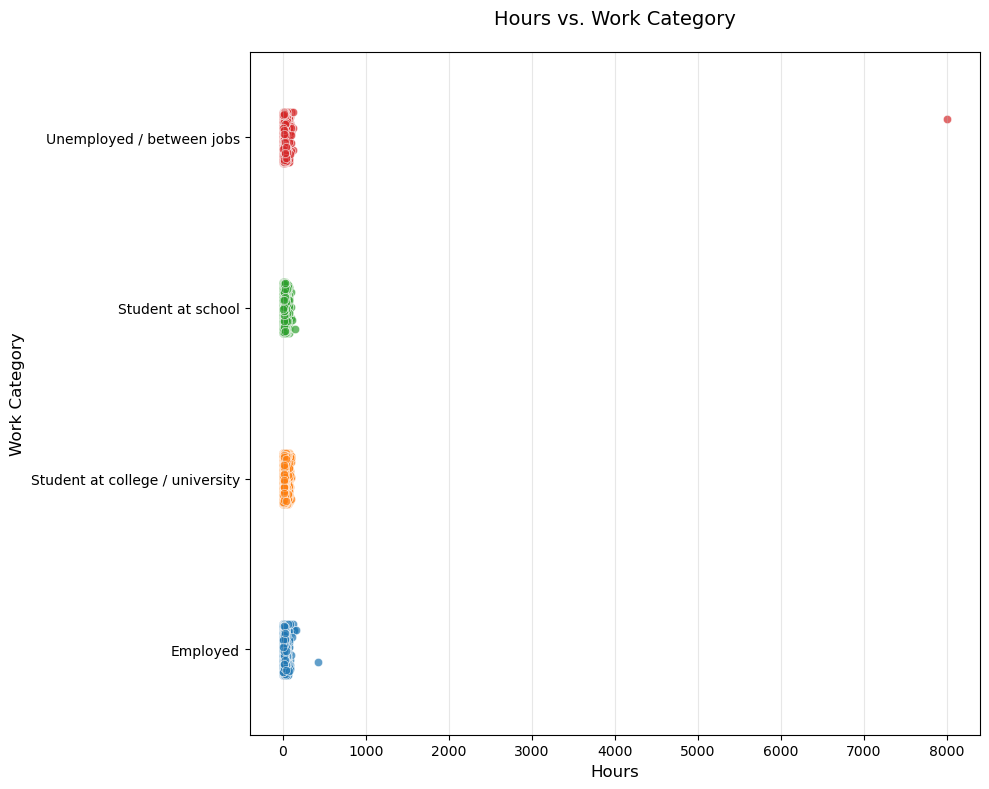

In [3]:
# Create a figure with a larger height to accommodate categories
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique categories and create numeric positions
work_categories = df['Work'].astype('category').cat.categories
y_positions = np.arange(len(work_categories))

# Create dictionary to map categories to y-values
category_map = {cat:i for i, cat in enumerate(work_categories)}

# Add jitter and plot
jitter_amount = 0.15  # Adjust this for optimal spacing
for cat in work_categories:
    mask = df['Work'] == cat
    x_values = df.loc[mask, 'Hours']
    y_values = np.full(sum(mask), category_map[cat])
    y_jittered = y_values + np.random.uniform(-jitter_amount, jitter_amount, len(y_values))
    
    ax.scatter(
        x=x_values,
        y=y_jittered,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5,
        label=cat  # For legend
    )

# Perfect y-axis formatting
ax.set_yticks(y_positions)
ax.set_yticklabels(work_categories)
ax.set_ylim(-0.5, len(work_categories)-0.5)  # Padding

# Add labels and title
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Work Category", fontsize=12)
ax.set_title("Hours vs. Work Category", fontsize=14, pad=20)
ax.grid(True, axis='x', alpha=0.3)  # Only horizontal grid

# Optional legend (choose one - either y-axis or legend)
#ax.legend(title='Work Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the graph as a PNG
plt.savefig(
    'work_hours_scatterplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

plt.tight_layout()
plt.show()

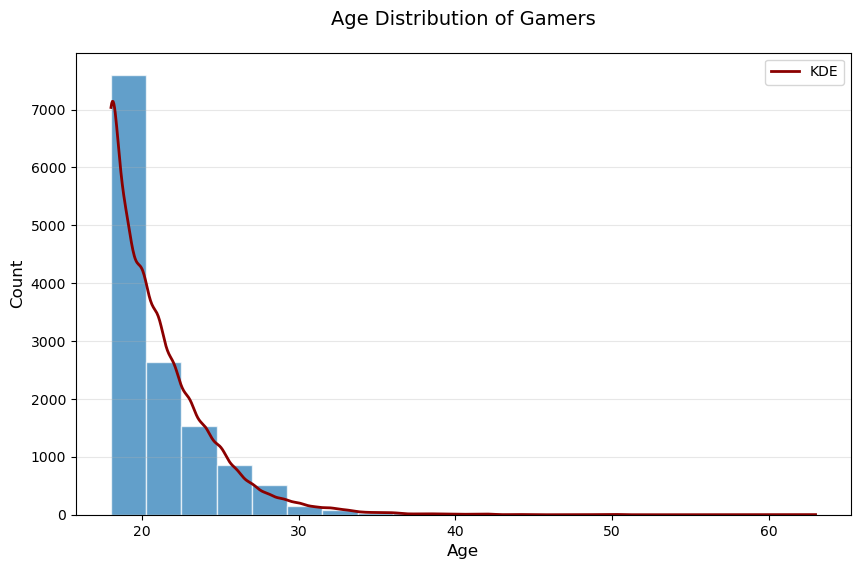

In [4]:
# Histogram of Age of participants
# Create figure
plt.figure(figsize=(10, 6))

# Create histogram using matplotlib only
n, bins, patches = plt.hist(
    df['Age'],            # Your age data
    bins=20,              # Number of bins
    edgecolor='white',    # Edge color for bars
    linewidth=1,          # Edge line width
    alpha=0.7,            # Transparency
    density=False         # Set to True if you want density instead of count
)

# Add KDE (Kernel Density Estimate) - manual implementation
if True:  # Set to False if you don't want KDE
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df['Age'].dropna())
    x_grid = np.linspace(min(df['Age']), max(df['Age']), 1000)
    kde_values = kde(x_grid) * len(df['Age']) * (bins[1] - bins[0])  # Scale to match histogram
    plt.plot(x_grid, kde_values, color='darkred', linewidth=2, label='KDE')

# Add labels and title
plt.title('Age Distribution of Gamers', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid
plt.grid(axis='y', alpha=0.3)

# Add legend if KDE is shown
if True:  # Match this with KDE condition above
    plt.legend()

# Save the graph as a PNG
plt.savefig(
    'age_distribution_histogram.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

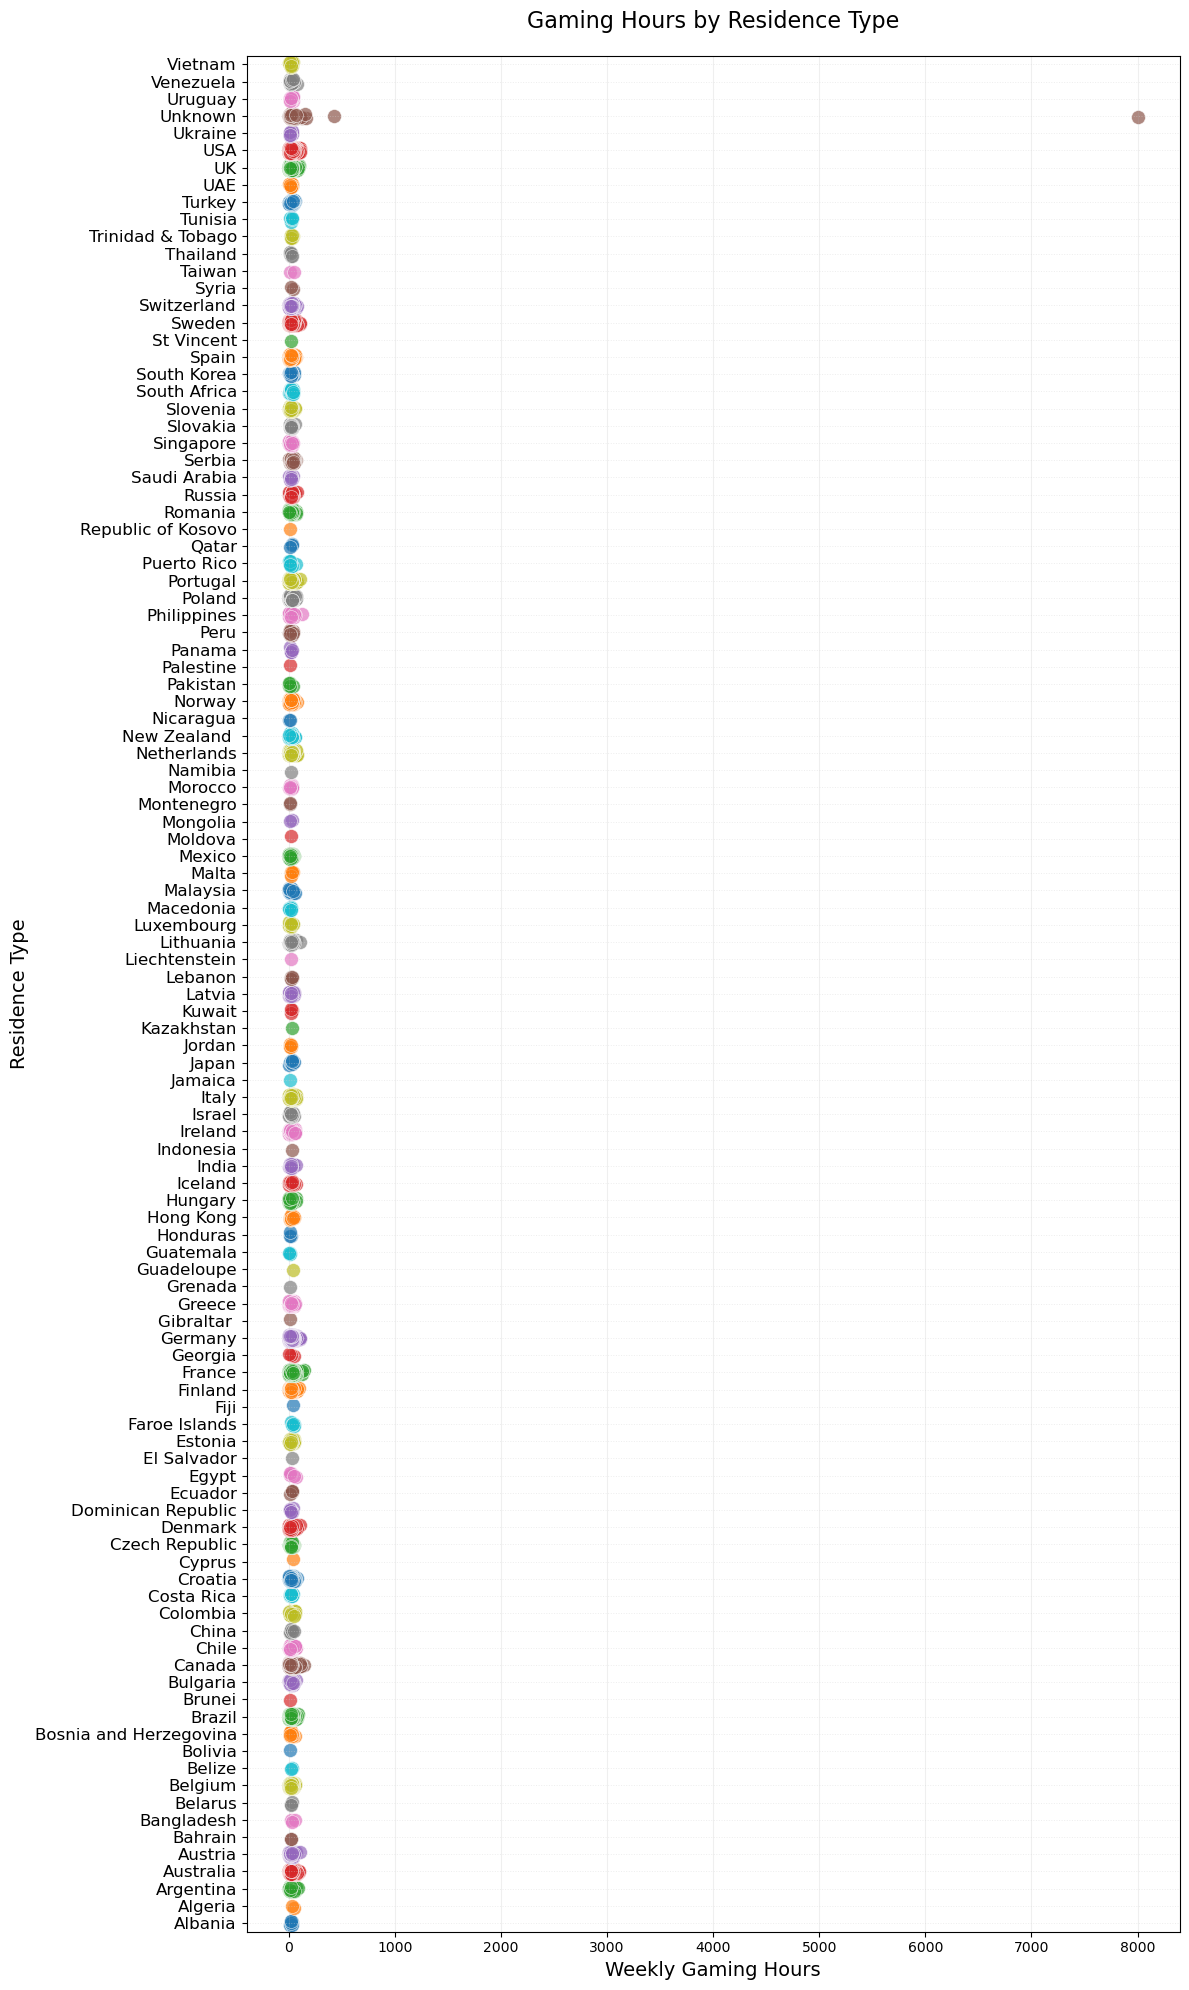

In [5]:
# Set up figure with extra height
plt.figure(figsize=(12, 20))  # Increased height for better spacing

# Get categories and create positions
residence_cats = df['Residence'].astype('category').cat.categories
y_positions = np.arange(len(residence_cats)) * 2  # Double the spacing

# Create plot with jitter
jitter = 0.3  # Increased jitter range
for i, residence in enumerate(residence_cats):
    subset = df[df['Residence'] == residence]
    y_values = np.full(len(subset), y_positions[i])
    y_jittered = y_values + np.random.uniform(-jitter, jitter, len(y_values))
    
    plt.scatter(
        x=subset['Hours'],
        y=y_jittered,
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        label=residence,
        s=100
    )

# Enhanced y-axis formatting
plt.yticks(y_positions, residence_cats, fontsize=12)  # Larger font
plt.ylim(y_positions[0]-1, y_positions[-1]+1)  # Extra padding

# Add subtle reference lines
for pos in y_positions:
    plt.axhline(y=pos, color='lightgray', linestyle=':', alpha=0.4, linewidth=0.7)

# Final styling
plt.title('Gaming Hours by Residence Type', fontsize=16, pad=20)
plt.xlabel('Weekly Gaming Hours', fontsize=14)
plt.ylabel('Residence Type', fontsize=14)
plt.grid(True, axis='x', alpha=0.2)

plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'hours_residence_scatter.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

# Line Graph of Dataset

The dataset gauges three levels through various questions: what Anxiety levels are (GAD), what Social Phobia levels are (SPIN), and what Life Satisfaction levels are (SWL). These are the three main features evaluated, alongside data that represents details about each sample.

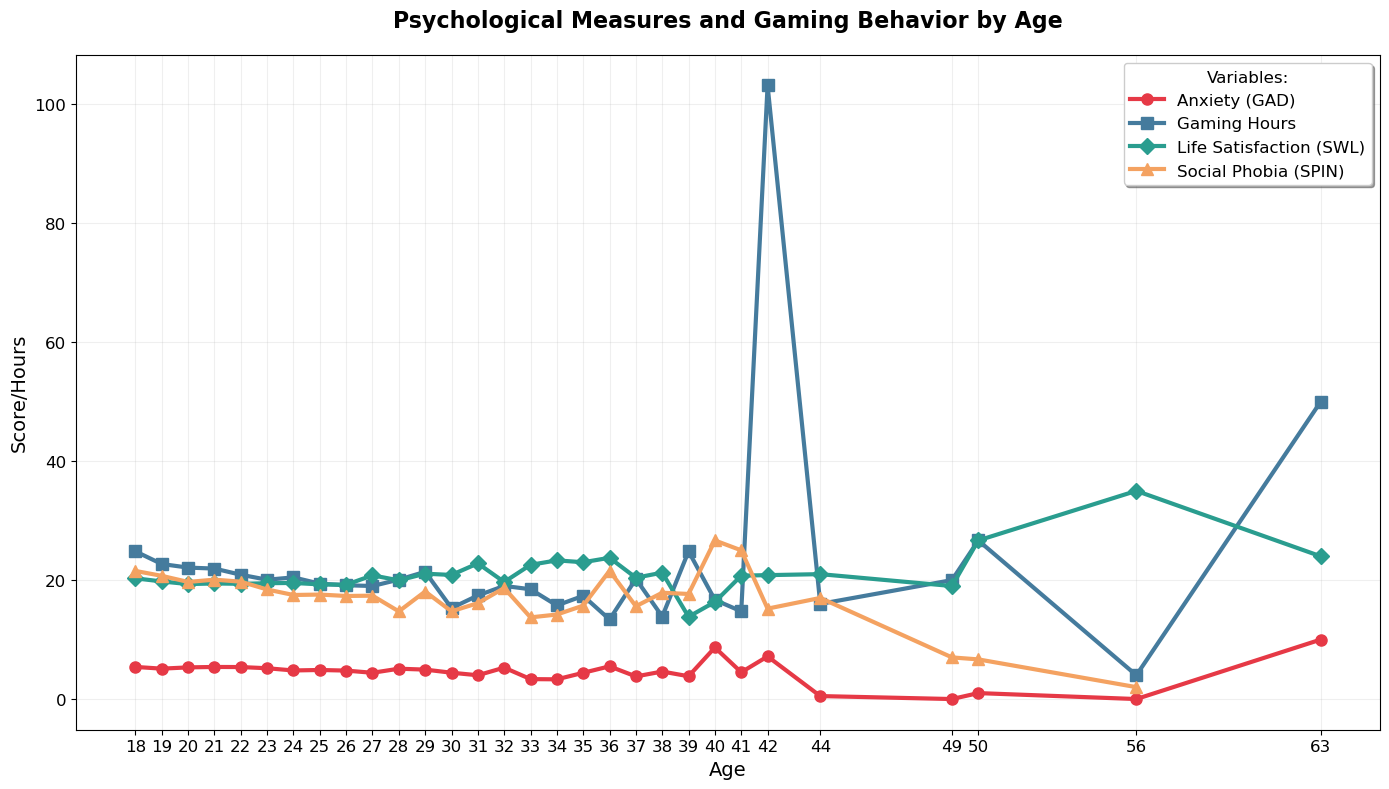

In [6]:
# Set up figure dimensions
plt.figure(figsize=(14, 8))

# Create a color-blind friendly palette with high contrast
colors = {
    'GAD': '#E63946',  # Vibrant red
    'Hours': '#457B9D',  # Deep blue
    'SWL': '#2A9D8F',  # Teal (distinct from blue)
    'SPIN': '#F4A261'  # Orange (complementary to blue)
}

# Create differentiated markers
markers = {
    'GAD': 'o',  # Circle
    'Hours': 's',  # Square
    'SWL': 'D',  # Diamond
    'SPIN': '^'  # Triangle
}

# Aggregate the data grouped by Age
age_agg = df.groupby('Age').agg({
    'GAD_T': 'mean',      # Anxiety scores
    'Hours': 'mean',      # Gaming hours
    'SWL_T': 'mean',      # Life satisfaction scores
    'SPIN_T': 'mean'      # Social phobia scores
}).reset_index()

# Plot Anxiety trend
plt.plot(age_agg['Age'], age_agg['GAD_T'], 
         marker=markers['GAD'], label='Anxiety (GAD)', 
         color=colors['GAD'], linewidth=3, markersize=8)
# Plot Hours trend
plt.plot(age_agg['Age'], age_agg['Hours'], 
         marker=markers['Hours'], label='Gaming Hours', 
         color=colors['Hours'], linewidth=3, markersize=8)
# Plot Life Satisfaction trend
plt.plot(age_agg['Age'], age_agg['SWL_T'], 
         marker=markers['SWL'], label='Life Satisfaction (SWL)', 
         color=colors['SWL'], linewidth=3, markersize=8)
# Plot Social Phobia trend
plt.plot(age_agg['Age'], age_agg['SPIN_T'], 
         marker=markers['SPIN'], label='Social Phobia (SPIN)', 
         color=colors['SPIN'], linewidth=3, markersize=8)

# Formatting
plt.title('Psychological Measures and Gaming Behavior by Age', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Score/Hours', fontsize=14)
plt.grid(True, alpha=0.2)

# Improved legend
legend = plt.legend(fontsize=12, framealpha=1, 
                    shadow=True, 
                    bbox_to_anchor=(1, 1),
                    title='Variables:',
                    title_fontsize=12)

# Customize ticks
plt.xticks(age_agg['Age'], fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'psychological_gaming_line.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

# Bar Graph of Dataset

The dataset gauges the density of Anxiety levels (GAD), Social Phobia levels (SPIN),
and Life Satisfaction levels (SWL). This helps to show the distribution of participants
amongst the three factors.

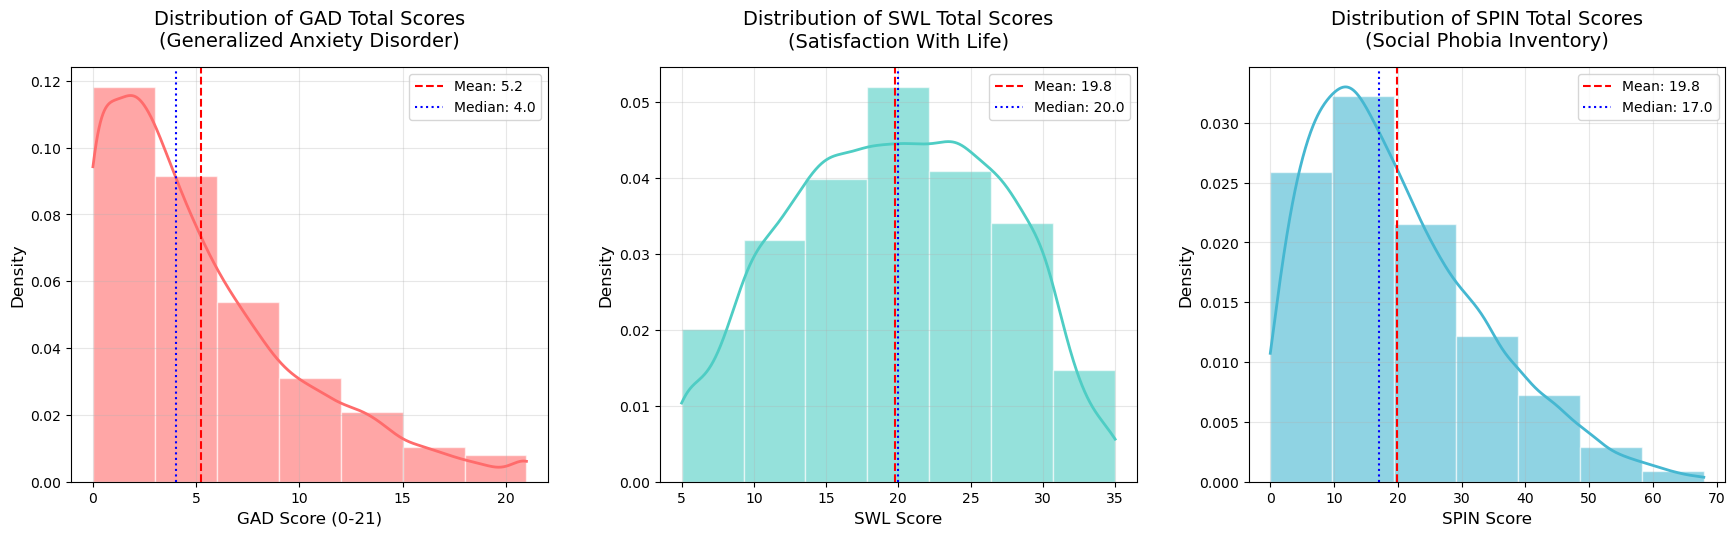

In [7]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Configure common styling
plt.style.use('default')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
titles = [
    'Distribution of GAD Total Scores\n(Generalized Anxiety Disorder)',
    'Distribution of SWL Total Scores\n(Satisfaction With Life)',
    'Distribution of SPIN Total Scores\n(Social Phobia Inventory)'
]
xlabels = ['GAD Score (0-21)', 'SWL Score', 'SPIN Score']

# Create each subplot
for i, (var, color, title, xlabel) in enumerate(zip(
    ['GAD_T', 'SWL_T', 'SPIN_T'], 
    colors, 
    titles, 
    xlabels
)):
    ax = axes[i]
    data = df[var].dropna()
    
    # Histogram with KDE
    n, bins, patches = ax.hist(
        data, 
        bins=7, 
        color=color, 
        alpha=0.6, 
        edgecolor='white',
        density=True
    )
    
    # Add KDE curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    ax.plot(x_vals, kde(x_vals), color=color, linewidth=2)
    
    # Add mean line
    mean_val = data.mean()
    ax.axvline(
        mean_val, 
        color='red', 
        linestyle='--', 
        linewidth=1.5,
        label=f'Mean: {mean_val:.1f}'
    )
    
    # Add median line
    median_val = data.median()
    ax.axvline(
        median_val, 
        color='blue', 
        linestyle=':', 
        linewidth=1.5,
        label=f'Median: {median_val:.1f}'
    )
    
    # Formatting
    ax.set_title(title, fontsize=14, pad=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

plt.tight_layout(pad=3.0)

# Save the graph as a PNG
plt.savefig(
    'psychological_gaming_bar.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

## Anxiety by Game

This gives a quick bar graph representation of the average anxiety level per game genre participants played.

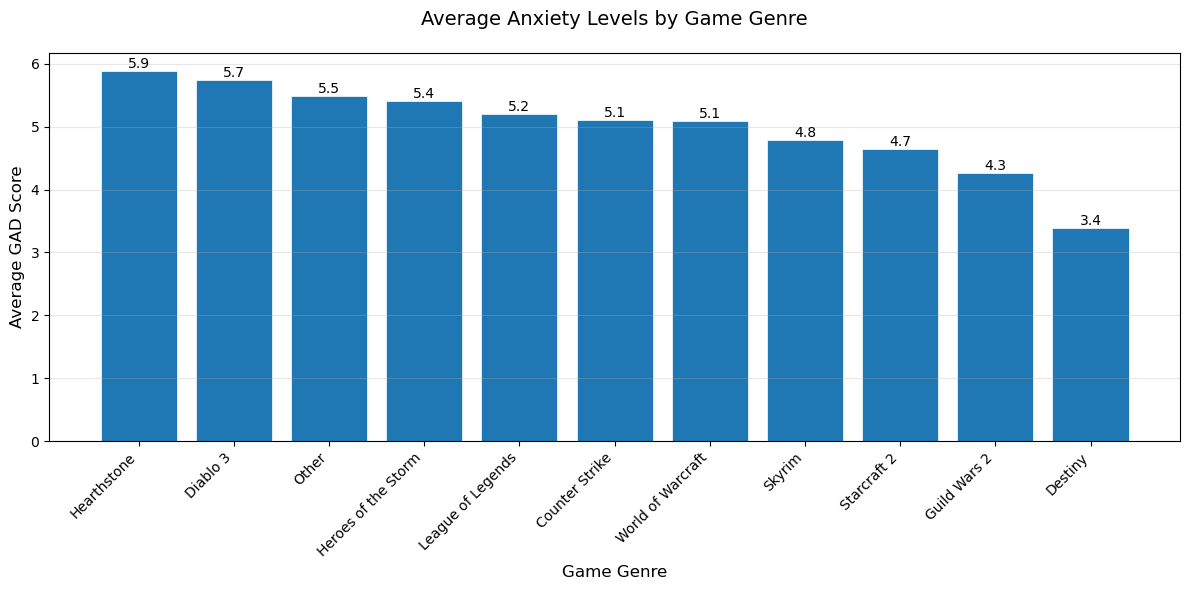

In [8]:
# Calculate average GAD_T per game genre
game_means = df.groupby('Game')['GAD_T'].mean().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(12, 6))
# Stylize the graph
plt.style.use('default')
plt.grid(axis='y', alpha=0.3)

# Create bar plot
bars = plt.bar(
    x=game_means.index, 
    height=game_means.values,
    color='#1f77b4',  # Matplotlib default blue
    edgecolor='white',
    linewidth=0.5
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom',
            fontsize=10)

# Formatting
plt.title('Average Anxiety Levels by Game Genre', fontsize=14, pad=20)
plt.xlabel('Game Genre', fontsize=12)
plt.ylabel('Average GAD Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-labels

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'average_anxiety_game_bar.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

# Pie Graph

This shows the distribution of the Anxiety, Life Satisfaction, and Social Phobia of the Gamers (participants)

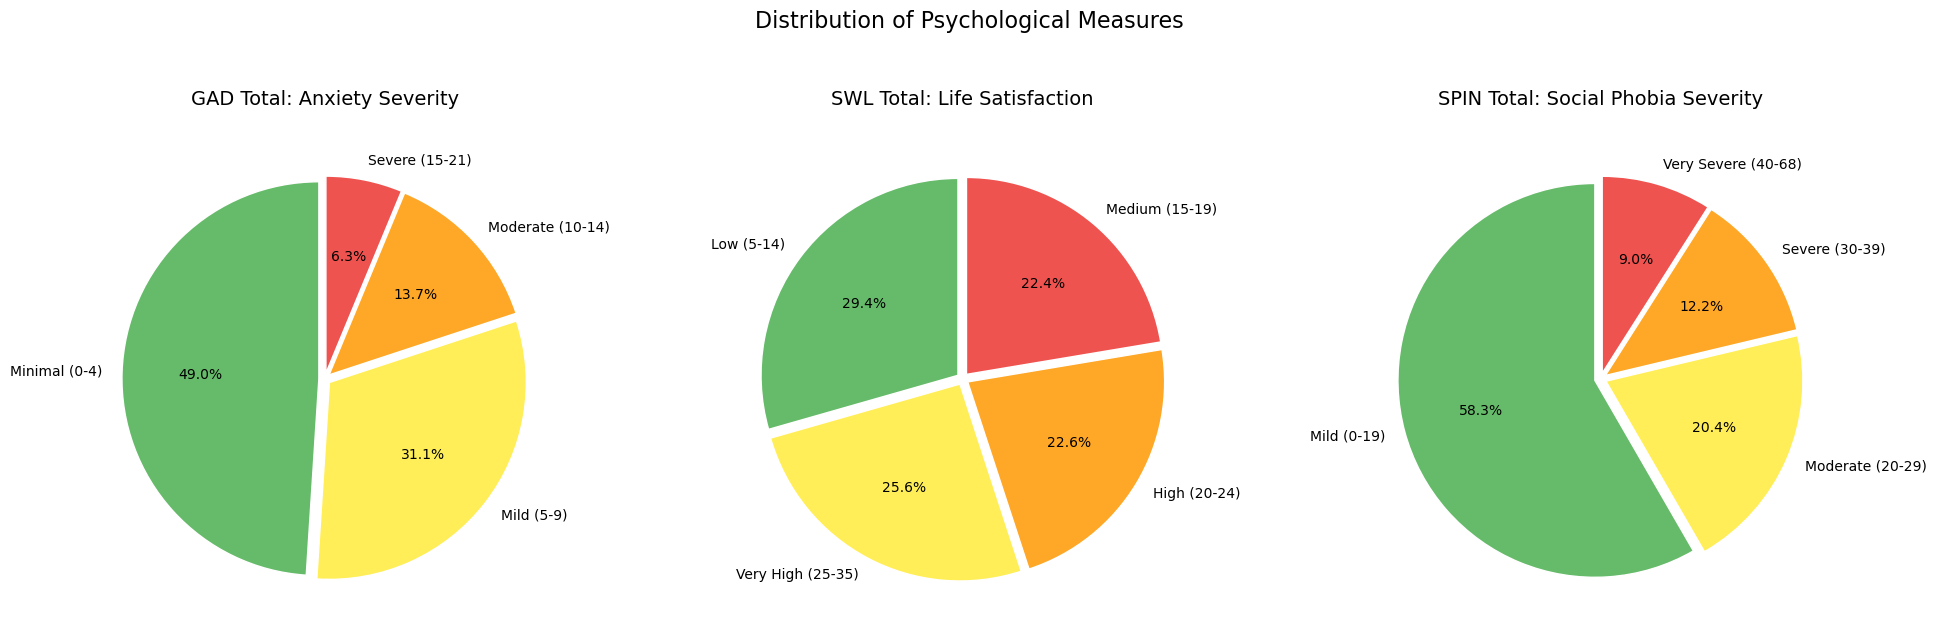

In [9]:
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define clinical categories for each measure
# 1. GAD_T Categories (Anxiety)
gad_bins = [0, 4, 9, 14, 21]
gad_labels = ['Minimal (0-4)', 'Mild (5-9)', 'Moderate (10-14)', 'Severe (15-21)']

# 2. SWL_T Categories (Life Satisfaction - hypothetical bins, adjust as needed)
swl_bins = [5, 15, 20, 25, 35]  # Example bins for SWL (5-35 scale)
swl_labels = ['Low (5-14)', 'Medium (15-19)', 'High (20-24)', 'Very High (25-35)']

# 3. SPIN_T Categories (Social Phobia - hypothetical bins, adjust as needed)
spin_bins = [0, 20, 30, 40, 68]  # Example bins for SPIN (0-68 scale)
spin_labels = ['Mild (0-19)', 'Moderate (20-29)', 'Severe (30-39)', 'Very Severe (40-68)']

# Common styling
colors = ['#66BB6A', '#FFEE58', '#FFA726', '#EF5350']  # Green, Yellow, Orange, Red
explode = (0.03, 0.03, 0.03, 0.03)
wedge_props = {'edgecolor': 'white', 'linewidth': 1}

# 1. GAD_T Pie Chart
df['GAD_Category'] = pd.cut(df['GAD_T'], bins=gad_bins, labels=gad_labels)
gad_dist = df['GAD_Category'].value_counts()
axes[0].pie(
    gad_dist,
    labels=gad_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10},
    wedgeprops=wedge_props
)
axes[0].set_title('GAD Total: Anxiety Severity', fontsize=14, pad=20)

# 2. SWL_T Pie Chart
df['SWL_Category'] = pd.cut(df['SWL_T'], bins=swl_bins, labels=swl_labels)
swl_dist = df['SWL_Category'].value_counts()
axes[1].pie(
    swl_dist,
    labels=swl_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10},
    wedgeprops=wedge_props
)
axes[1].set_title('SWL Total: Life Satisfaction', fontsize=14, pad=20)

# 3. SPIN_T Pie Chart
df['SPIN_Category'] = pd.cut(df['SPIN_T'], bins=spin_bins, labels=spin_labels)
spin_dist = df['SPIN_Category'].value_counts()
axes[2].pie(
    spin_dist,
    labels=spin_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10},
    wedgeprops=wedge_props
)
axes[2].set_title('SPIN Total: Social Phobia Severity', fontsize=14, pad=20)

# Add overall title
plt.suptitle('Distribution of Psychological Measures', fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'anxiety_distribution_pie.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()

# Box Chart

This is a box plot of the Total GAD, SWL, and SPIN scores showing the range of the distribution for each. This gives more insight into the variance levels within each category.

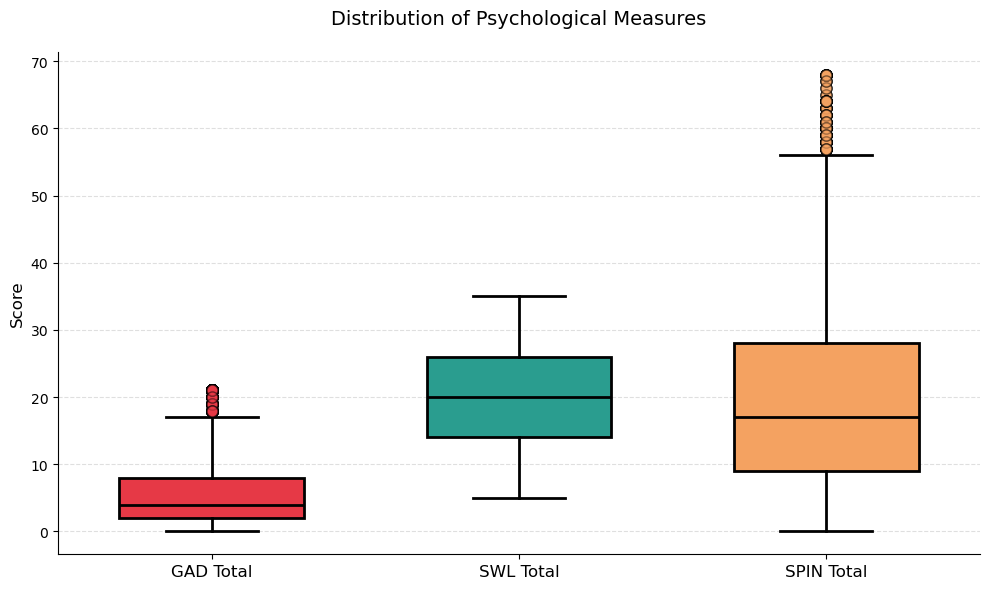

In [10]:
# Sample data (replace with your actual DataFrame columns)
data = {
    'GAD Total': df['GAD_T'].dropna(),    # Anxiety scores
    'SWL Total': df['SWL_T'].dropna(),    # Life satisfaction scores
    'SPIN Total': df['SPIN_T'].dropna()   # Social phobia scores
}

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Custom colors (color-blind friendly)
colors = {
    'GAD Total': '#E63946',   # Red
    'SWL Total': '#2A9D8F',   # Teal
    'SPIN Total': '#F4A261'   # Orange
}

# Plot boxplots
boxprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='black')

# Enumerate through the three totals and create boxplots
for i, (label, values) in enumerate(data.items()):
    bp = ax.boxplot(
        values,
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        flierprops=dict(marker='o', markersize=8, markerfacecolor=colors[label], alpha=0.5)
    )
    # Fill boxes with color
    for box in bp['boxes']:
        box.set_facecolor(colors[label])

# Customize axes
ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.keys(), fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Distribution of Psychological Measures', fontsize=14, pad=20)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Remove spines for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'psychological_distribution_boxplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Set to True for transparent background
    bbox_inches='tight'    # Remove extra whitespace
)

plt.show()
